# Medidas Electrónicas 1

## Trabajo Práctico Obligatorio Calibración

### **Curso:**

* R4052 2023

### **Docentes:**

* Marinsek, Emiliano
* Perdomo, Juan Manuel

### **Nº de Grupo:**

* 2

###   **Integrantes:**

* Borello, Federico
* Dimaio, Agustin
* Manoukian, Francisco Tomas
* Mella, Camila
* Ronchetti Juan Manuel

# Cálculos a realizar

A continuacion se detallan las ecuaciones que se emplearán para realizar la calibración:

$$N = \cfrac{T_i}{T_g}$$

$$T_g = 10^k \, T_{\text{BT}}$$

## Incertidumbre del Frecuencímetro Patrón:

$$\cfrac{\Delta T_i}{T_i} = \pm \Big( \Big|\cfrac{\Delta f_{\text{BT}}}{f_{\text{BT}}}\Big| + \Big|\cfrac{\Delta N}{N}\Big| + |e_D| \Big)$$

Con:

$$e_D = 2 \; \cfrac{\Delta T}{T}$$

y:

$$ \Delta T = \cfrac{\Delta V}{\cfrac{dV}{dt}\Big|_{t = t_{\text{TRG}}}}$$


## Incertidumbre del Cristal

Si se tiene en cuenta que todos los prescalers, PLLs y fases previas no influyen en el clock utilizado por el hardware del microcontrolador y que el hardware no presenta una incertidumbre apreciable, se puede decir que la incertidumbre del cristal afecta directamente a las cuentas obtenidas por el timer del micro.

# Especificaciones

A continuacion se detallan las especificaciones de los instrumentos y componentes utilizados:

#### Especificaciones del Frecuencimetro
* Modelo: Protek U2000A
* Time Base: 10MHz CH_A
* Stability: $\pm$ 0.3ppm/month
* Accuracy: $\pm$ 5ppm
* [Datasheet](http://2r-he.blogspot.com/2011/12/protek-u2000a-frequency-counter.html)

#### Especificaciones del generador de señales:
* Modelo: Twintex TFG-3205E
* Generador: $\pm (50ppm + 5ppm/3hs)$

#### Especificaciones del cristal del microcontrolador:
* Frequency Tolerance: $\pm$ 10ppm ~ $\pm$ 30ppm
* Frequency Stability: $\pm$ 10ppm ~ $\pm$ 30ppm
* Aging: $\pm$ 3ppm/year || $\pm$ 5ppm/year (1st year)
* [Datasheet](https://abracon.com/datasheets/Fox/FC4ST.pdf?utm_source=foxonline.com&utm_medium=301)

Tabla de mediciones:

| Medición | Patrón [$\mu s$] | Micro [$\mu s$] |
|:--------:|:-----:|:---------:|
|     50[Hz]     |  20_000.74 |    20_001.97   |
|     100[Hz]    |  10_000.37 |    10_000.98   |
|     200[Hz]    |   5_000.19 |     5_000.41   |
|     300[Hz]    |   3_333.46 |     3_333.46   |
|     400[Hz]    |   2_500.09 |     2_500.20   |
|     500[Hz]    |   2_000.07 |     2_000.20   |
|     600[Hz]    |   1_666.72 |     1_666.80   |

Se eligieron valores entre 50Hz y 600Hz ya que el frecuencímetro implementado con el comparador con histéresis y el microcontrolador está diseñado para funcionar a frecuencias generadas por instrumentos musicales de cuerda, las cuales están comprendidas entre 50 y 500Hz aproximadamente.

>- NOTA: Para realizar las mediciones se utilizó un generador de señales Twintex con una señal cuadrada. Por ello, el error de disparo será despreciable.


In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import display, Math

def uBr_Frec(Ti, k=1, Tbt=1/10e6) -> float:
    N = Ti/((10**k) * Tbt)
    # se estima que el frecuencímetro tuvo 10 años de uso
    return (5e-6 + 0.3e-6 * 12 * 10 + 1/N)/np.sqrt(3)

def uBr_Crystal(Ti) -> float:
    Tbt = (1/72e6) * (109)
    N = Ti/(Tbt)
    # se estima que tuvo 5 años en uso
    # se estima delta N = 1
    return (60e-6 + 5e-6 + 3e-6 * 4 + 1/N)/np.sqrt(3)

def uBr_GEN() -> float:
    # se tiene en cuenta 1 hora de encendido el generador
    return (50e-6 + 5e-6 * (1/3))/np.sqrt(3)

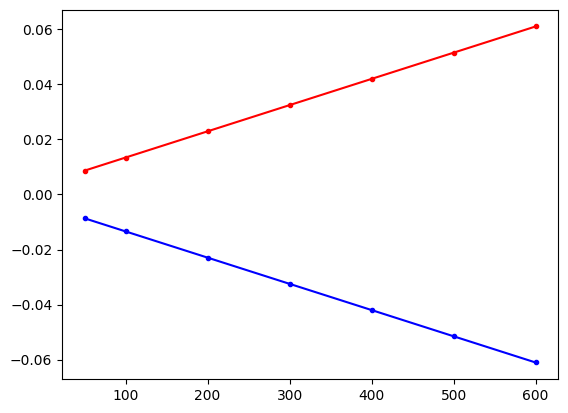

In [ ]:
points = [50, 100, 200, 300, 400, 500, 600]
Mp = [20_000.74e-6, 10_000.37e-6, 5_000.19e-6, 3_333.46e-6, 2_500.09e-6, 2_000.07e-6, 1_666.72e-6]
Fp = []
e_porc_plus = []
e_porc_minus = []

k = 1.65

for i, t in enumerate(Mp):
    freq = 1/t
    Fp.append(freq)

    uBr_t = uBr_Frec(t)
    e_porc_plus.append(((uBr_t * k))* 100)
    e_porc_minus.append(((- uBr_t * k))* 100)

fig, ax = plt.subplots()

ax.plot(points, e_porc_plus, '.-r')
ax.plot(points, e_porc_minus, '.-b')

La imágen anterior es un gráfico con la incertidumbre relativa positiva y negativa del patrón multiplicada por 100.

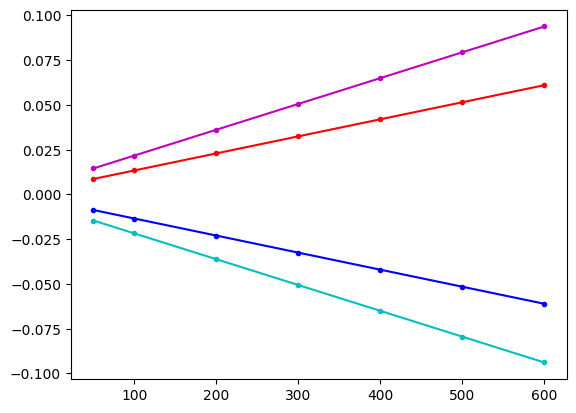

In [ ]:
Mm = [20_001.97e-6, 10_000.98e-6, 5_000.41e-6, 3_333.46e-6, 2_500.20e-6, 2_000.20e-6, 1_666.80e-6]
Fm = []
e_micro_porc_plus = []
e_micro_porc_minus = []

for i, t in enumerate(Mm):
    freq = 1/t
    Fm.append(freq)

    uBr_crystal = uBr_Crystal(t)
    e_micro_porc_plus.append(((uBr_crystal * k))* 100)
    e_micro_porc_minus.append(((- uBr_crystal * k)) * 100)

fig, ax = plt.subplots()

ax.plot(points, e_porc_plus, '.-r')
ax.plot(points, e_micro_porc_plus, '.-m')
ax.plot(points, e_micro_porc_minus, '.-c')
ax.plot(points, e_porc_minus, '.-b')


Lineas ROJA y AZUL - Instrumento Patrón
Lineas MAGENTA y CYAN - Instrumento a Calibrar

Al hacer la comparación de las incertidumbres relativas con el gráfico precedente, se observa que la incertidumbre del patrón está contenida por la incertidumbre que presenta el cristal, además la probabilidad de obtener un valor por afuera de la incertidumbre del patrón con el frecuencímetro a calibrar incrementa según se aumenta la frecuencia.

Por ende, si se tiene en cuenta la variabilidad del cristal entre distintos productos iguales, y la baja probabilidad de obtener un valor muy distante del valor patrón, el valor obtenido por el frecuencímetro a calibrar se puede *considerar* como calibrado.